<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project2 - Bike Sharing</h3>
</div>

<img src = "https://storage.googleapis.com/kaggle-competitions/kaggle/3948/media/bikes.png" width=80%>

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

import calendar
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

## Load and Prepare Data

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
print(train_df.shape)
print(test_df.shape)

(10886, 12)
(6493, 9)


In [5]:
train_df.sample(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
2109,2011-05-14 19:00:00,2,0,0,3,22.14,25.760,94,8.9981,69,179,248
9478,2012-09-18 07:00:00,3,0,1,2,26.24,28.790,89,30.0026,13,343,356
9616,2012-10-05 01:00:00,4,0,1,1,22.14,25.760,68,7.0015,3,43,46
2048,2011-05-12 06:00:00,2,0,1,1,18.04,21.970,88,0.0000,9,103,112
921,2011-03-02 20:00:00,1,0,1,1,14.76,16.665,29,27.9993,9,86,95


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
train_df.nunique()

,0
datetime,10886
season,4
holiday,2
workingday,2
weather,4
temp,49
atemp,60
humidity,89
windspeed,28
casual,309


In [8]:
train_df["date"] = train_df.datetime.apply(lambda x : x.split()[0])
train_df["hour"] = train_df.datetime.apply(lambda x : x.split()[1].split(":")[0])
train_df["weekday"] = train_df.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
train_df["month"] = train_df.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])

In [9]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00,Saturday,January
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01,Saturday,January
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,02,Saturday,January
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,03,Saturday,January
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,04,Saturday,January


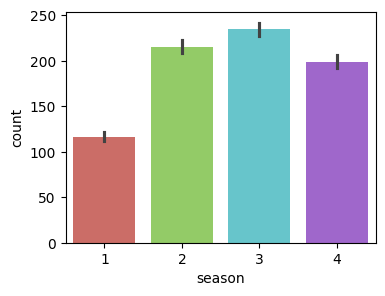

In [10]:
plt.figure(figsize=(4, 3))
sns.barplot(x="season", y="count", data=train_df, palette='hls')
plt.show()


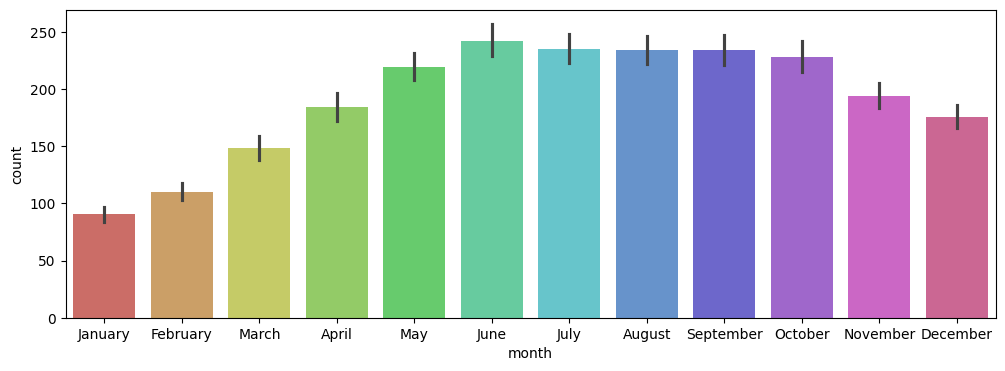

In [11]:
plt.figure(figsize=(12,4))
sns.barplot(x="month", y="count",data=train_df, palette='hls')
plt.show()

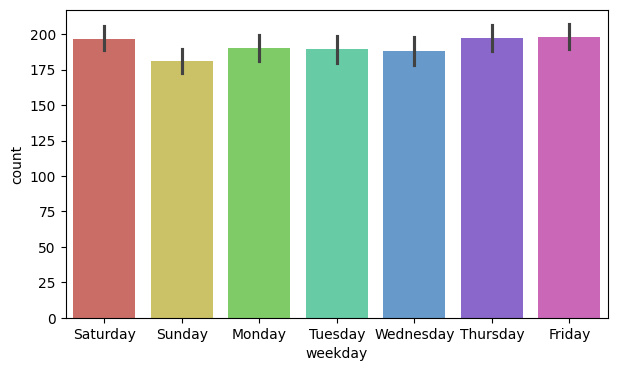

In [12]:
plt.figure(figsize=(7,4))
sns.barplot(x="weekday", y="count", data=train_df, palette='hls')
plt.show()

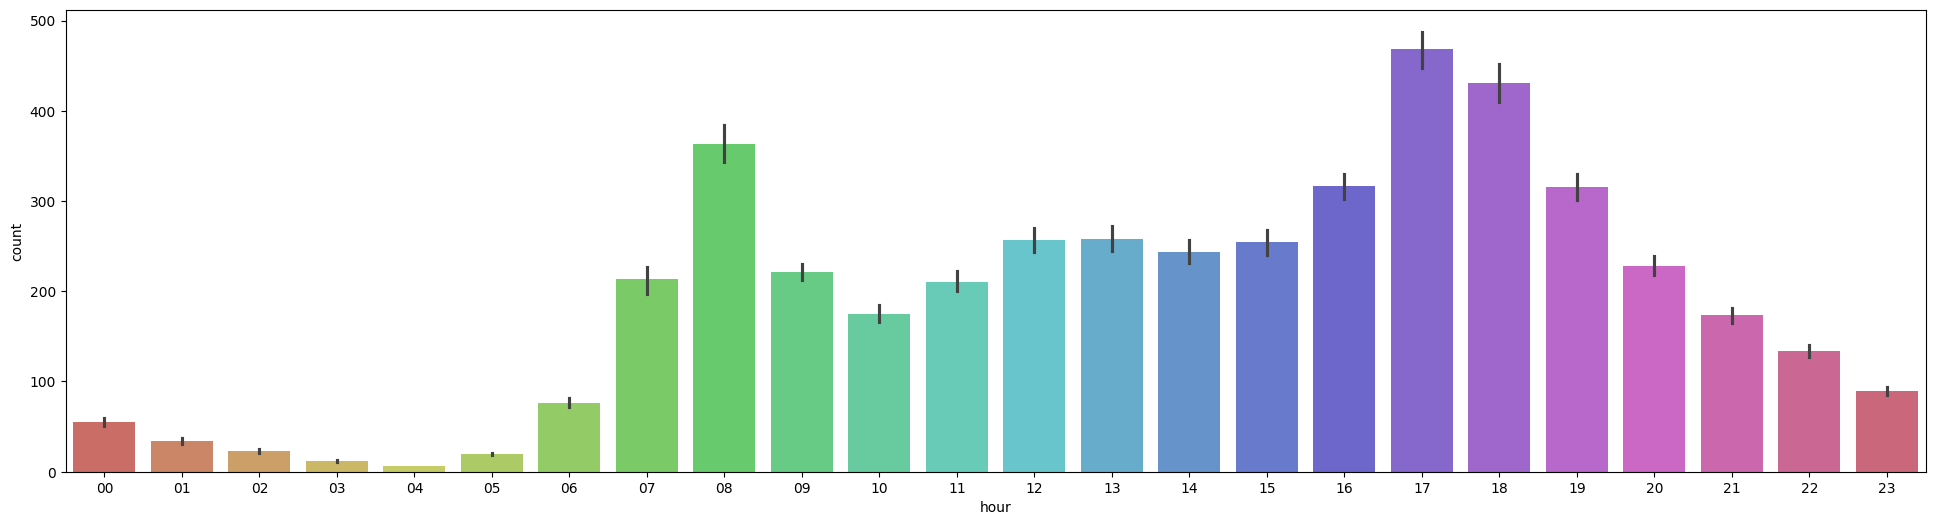

In [13]:
plt.figure(figsize=(24,6))
sns.barplot(x="hour", y="count",data=train_df, palette='hls')
plt.show()

In [14]:
WeekDay = pd.get_dummies(train_df.weekday, dtype=int)
Month = pd.get_dummies(train_df.month, dtype=int)
train_df_final = pd.concat([train_df,Month,WeekDay], axis=1)
train_df_final.drop(["weekday","month","datetime","date"],axis=1,inplace=True)
train_df_final.head().T

,0,1,2,3,4
season,1,1,1,1,1
holiday,0,0,0,0,0
workingday,0,0,0,0,0
weather,1,1,1,1,1
temp,9.84,9.02,9.02,9.84,9.84
atemp,14.395,13.635,13.635,14.395,14.395
humidity,81,80,80,75,75
windspeed,0.0,0.0,0.0,0.0,0.0
casual,3,8,5,3,0
registered,13,32,27,10,1


In [15]:
corr_df = train_df_final.corr()
corr_df["count"].sort_values()

,count
humidity,-0.317371
January,-0.166108
February,-0.135275
weather,-0.128655
March,-0.071981
December,-0.026644
Sunday,-0.024409
April,-0.012354
Wednesday,-0.007117
holiday,-0.005393


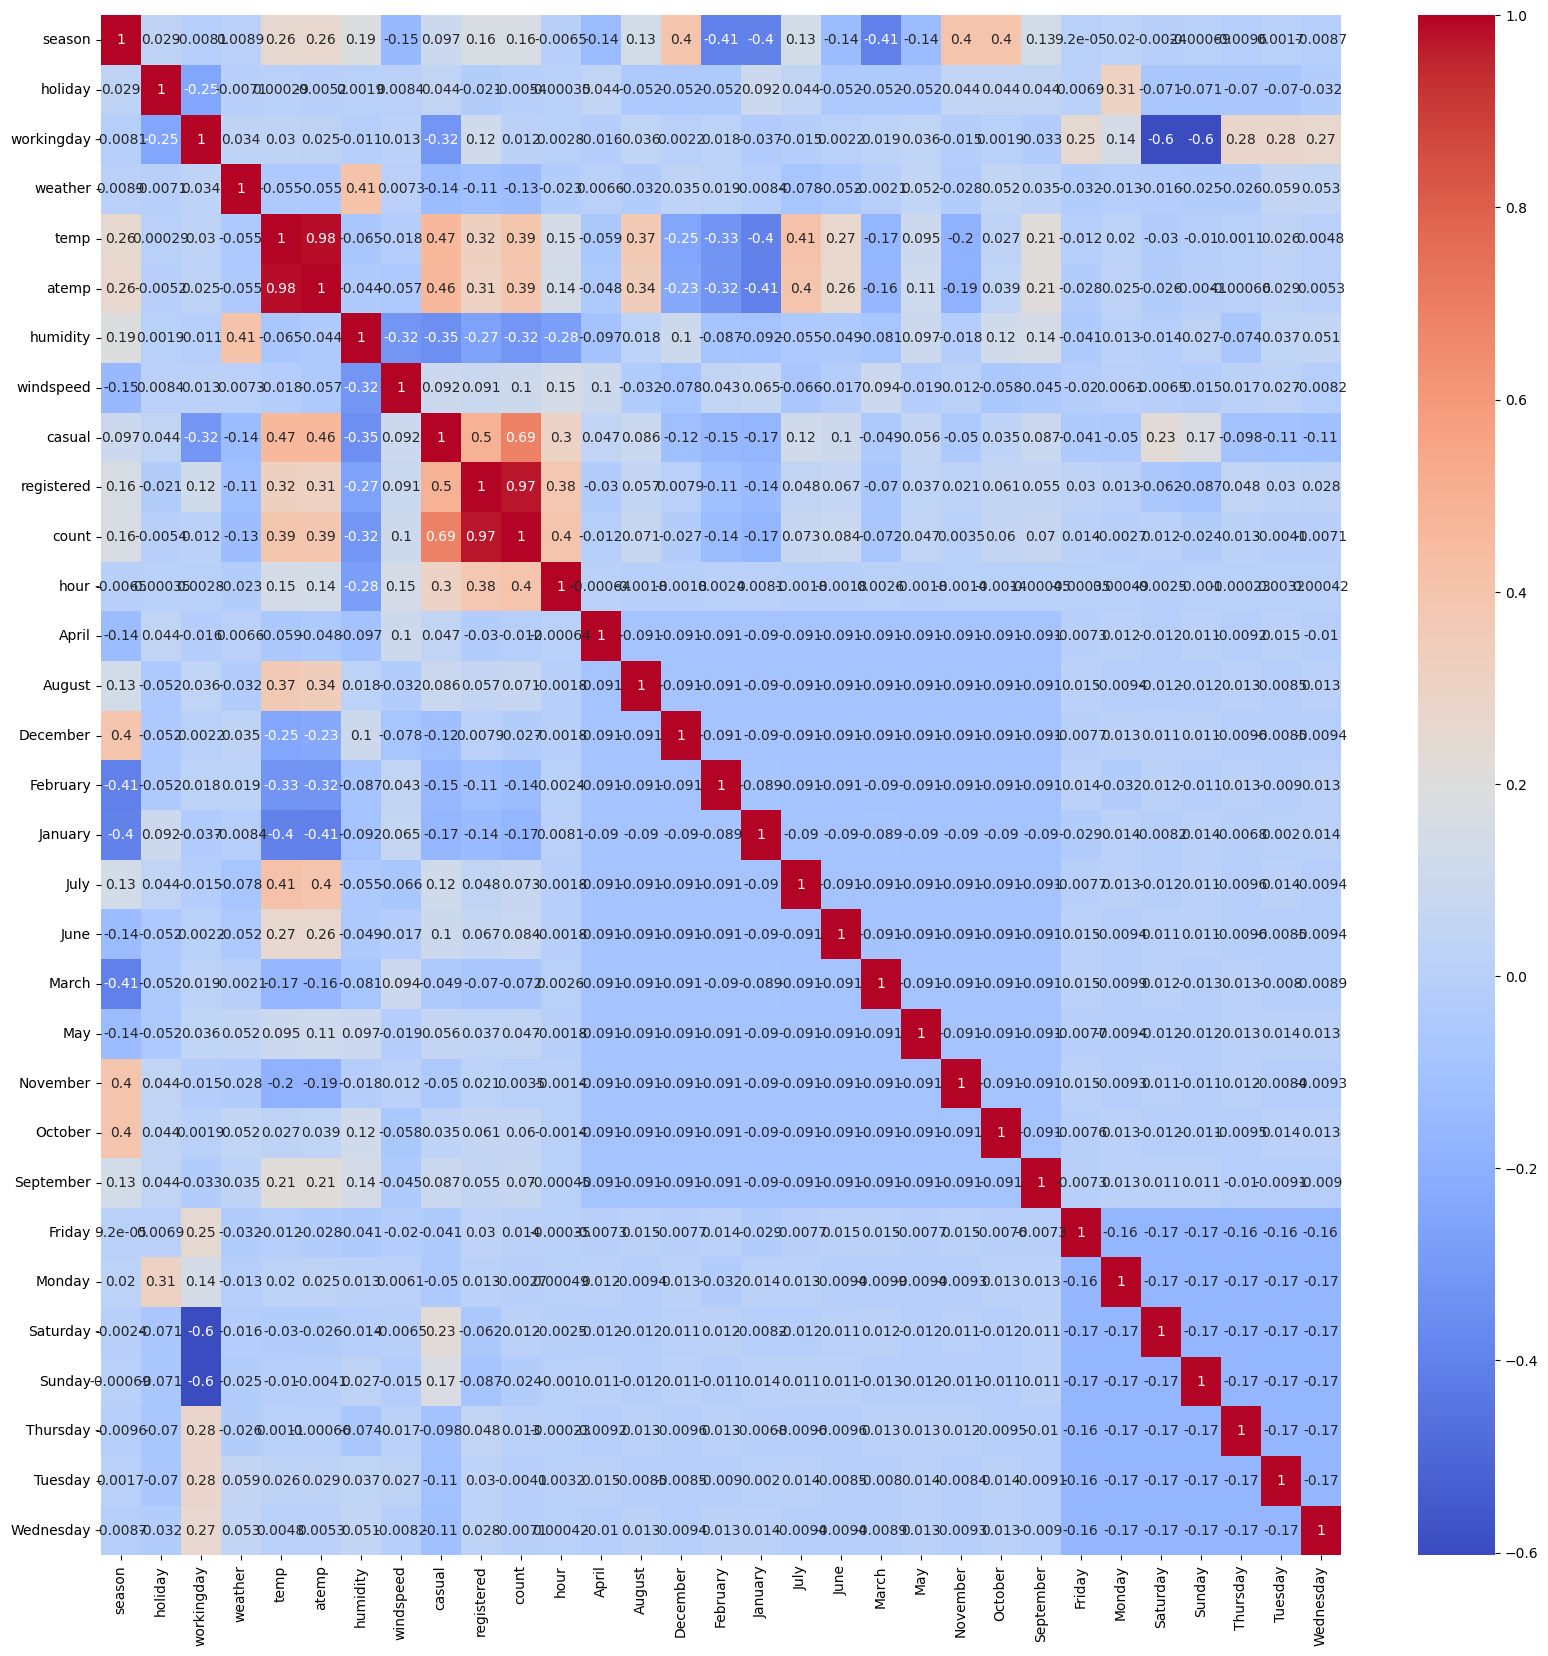

In [16]:
plt.figure(figsize = (20,20))
sns.heatmap(corr_df, annot=True, cmap="coolwarm")
plt.show()

In [17]:
test_df["date"] = test_df.datetime.apply(lambda x : x.split()[0])
test_df["hour"] = test_df.datetime.apply(lambda x : x.split()[1].split(":")[0])
test_df["weekday"] = test_df.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
test_df["month"] = test_df.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])

In [18]:
WeekDay = pd.get_dummies(test_df.weekday, dtype=int)
Month = pd.get_dummies(test_df.month, dtype=int)
test_df_final = pd.concat([test_df,Month,WeekDay], axis=1)
test_df_final.drop(["weekday","month","datetime","date"],axis=1,inplace=True)

## Train your model (Regression)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [20]:
X = train_df_final.drop(["count","casual","registered"],axis=1)
y = train_df_final["count"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 25, test_size = .3)

In [21]:
print(train_df_final.shape)
print(X.shape)
print(y.shape)
print(X_train.shape)
print(y_train.shape)

(10886, 31)
(10886, 28)
(10886,)
(7620, 28)
(7620,)


In [22]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = pd.DataFrame(lr.predict(X_test))

In [23]:
y_pred

,0
0,17.223633
1,161.826172
2,205.937500
3,295.898438
4,180.669922
...,...
3261,361.999023
3262,322.869141
3263,354.152344
3264,181.873047


In [24]:
y_test

,count
1616,34
7554,2
4137,126
9266,585
110,132
...,...
8983,419
8430,271
3931,261
10753,211


In [25]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

109.12906980777328
22552.15791049094
150.17375906093227


In [26]:
y_pred_submission = pd.DataFrame(lr.predict(test_df_final)).apply(np.floor).astype(int)
y_pred_submission.sample(5)

,0
1519,-41217759
5555,-41217891
1263,442
2623,139
2150,78


In [27]:
submission_df = pd.concat([test_df["datetime"], y_pred_submission], axis=1)
submission_df.rename(columns={0:"count"}, inplace=True)

In [28]:
submission_df.to_csv('submission.csv')


## Send us the Result (Maktabkhoone)